In [24]:
import torch
from torchvision import transforms
from torch.utils.data import TensorDataset
from PIL import Image

In [18]:
data_augmentation = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(30),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1)
])

In [31]:
# Function to apply data augmentation to tokenized images
def apply_augmentation_to_tensor(tensor_img):
    # Convert tensor to PIL Image
    pil_img = transforms.ToPILImage()(tensor_img)
    
    # Apply data augmentation
    augmented_img = data_augmentation(pil_img)
    
    # Convert augmented PIL Image back to tensor
    # augmented_tensor_img = transforms.ToTensor()(augmented_img)
    
    # return augmented_tensor_img
    return augmented_img

Maximum supported image dimension is 65500 pixels


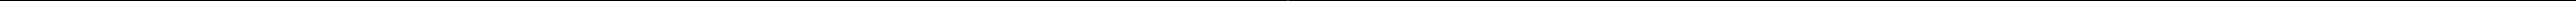

In [32]:
var_tensor = torch.load("/home/sklaptop/Downloads/OneDrive_2023-12-18/P25 - Visual Search/tokenized_images/tokenized_images_0.pt")
apply_augmentation_to_tensor(var_tensor)

In [26]:
num_batches = 922

In [28]:
for batch_idx in range(num_batches):
    tokenized_images = torch.load(f'/home/sklaptop/Downloads/OneDrive_2023-12-18/P25 - Visual Search/tokenized_images/tokenized_images_{batch_idx}.pt')

    augmented_images_tf = apply_augmentation_to_tensor(tokenized_images)

    # Save the augmented images
    torch.save(augmented_images_tf, f'/home/sklaptop/Downloads/OneDrive_2023-12-18/P25 - Visual Search/tokenized_images/tokenized_images_{batch_idx}.pt')

    print(f"Augmented images for batch {batch_idx} saved.")

Augmented images for batch 0 saved.
Augmented images for batch 1 saved.
Augmented images for batch 2 saved.
Augmented images for batch 3 saved.
Augmented images for batch 4 saved.
Augmented images for batch 5 saved.
Augmented images for batch 6 saved.
Augmented images for batch 7 saved.
Augmented images for batch 8 saved.
Augmented images for batch 9 saved.
Augmented images for batch 10 saved.
Augmented images for batch 11 saved.
Augmented images for batch 12 saved.
Augmented images for batch 13 saved.
Augmented images for batch 14 saved.
Augmented images for batch 15 saved.
Augmented images for batch 16 saved.
Augmented images for batch 17 saved.
Augmented images for batch 18 saved.
Augmented images for batch 19 saved.
Augmented images for batch 20 saved.
Augmented images for batch 21 saved.
Augmented images for batch 22 saved.
Augmented images for batch 23 saved.
Augmented images for batch 24 saved.
Augmented images for batch 25 saved.
Augmented images for batch 26 saved.
Augmented i

In [33]:
# Single transformation function
def apply_single_augmentation_to_tensor(tensor_img, transformation):
    pil_img = transforms.ToPILImage()(tensor_img)
    augmented_img = transformation(pil_img)
    augmented_tensor_img = transforms.ToTensor()(augmented_img)
    return augmented_tensor_img

In [40]:
# Load a single image tensor from a batch
batch_idx = 40
single_image_idx = 0
tokenized_images = torch.load(f'/home/sklaptop/Downloads/OneDrive_2023-12-18/P25 - Visual Search/tokenized_images/tokenized_images_{batch_idx}.pt')
single_image = tokenized_images[single_image_idx]

In [41]:
# Apply each transformation separately to identify the problematic one
transformation_list = [
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(30),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1)
    # Add other transformations here
]

In [42]:
for transformation in transformation_list:
    try:
        augmented_image = apply_single_augmentation_to_tensor(single_image, transformation)
        print(f"Transformation applied successfully: {transformation}")
        print(f"Augmented image: {augmented_image}")
    except Exception as e:
        print(f"Error with transformation: {transformation} - {e}")

Transformation applied successfully: RandomHorizontalFlip(p=0.5)
Augmented image: tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])
Transformation applied successfully: RandomVerticalFlip(p=0.5)
Augmented image: tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])
Transformation applied successfully: RandomRotation(degrees=[-30.0, 30.0], interpolation=nearest, expand=False, fill=0)
Augmented image: tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],

In [44]:
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

# Function to apply data augmentation to a single image tensor
def apply_augmentation_to_tensor(tensor_img):
    # Convert tensor to PIL Image
    pil_img = transforms.ToPILImage()(tensor_img)
    
    # Apply data augmentation
    augmented_img = data_augmentation(pil_img)
    
    # Convert augmented PIL Image back to tensor
    augmented_tensor_img = transforms.ToTensor()(augmented_img)
    
    # Convert tensor back to PIL Image for visualization
    augmented_img_display = transforms.ToPILImage()(augmented_tensor_img)
    
    return augmented_img_display

# Load a single image tensor from a batch
batch_idx = 34
single_image_idx = 0
tokenized_images = torch.load(f'/home/sklaptop/Downloads/OneDrive_2023-12-18/P25 - Visual Search/tokenized_images/tokenized_images_{batch_idx}.pt')
single_image = tokenized_images[single_image_idx]

# Apply data augmentation to the single image
augmented_image_display = apply_augmentation_to_tensor(single_image)

# Visualize the augmented image
plt.imshow(augmented_image_display)
plt.axis('off')
plt.show()


In [46]:
single_image.shape

torch.Size([32, 196608])